In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("crime_data.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
# Normeliz the data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
xs = scaler.fit_transform(df)
xs

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## K-Mean

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

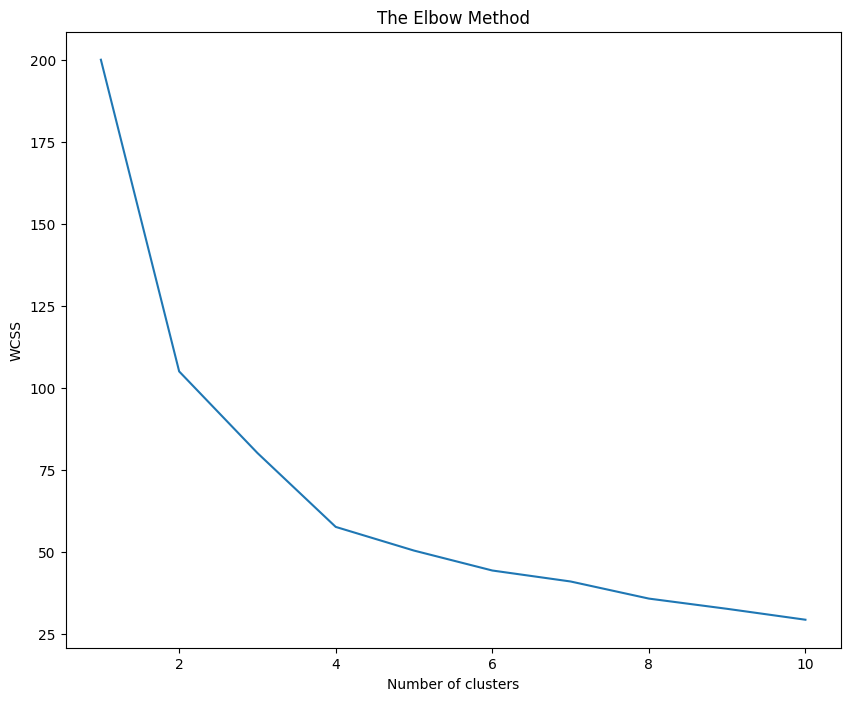

In [9]:
plt.figure(figsize=(10,8))
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(xs)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmean = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmean = kmean.fit_predict(xs)
y_kmean

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [11]:
y_kmean1=y_kmean+1
cluster = list(y_kmean1)
df['cluster'] = cluster

In [12]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,3


In [13]:
kmean_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmean_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,5.7,138.9,73.9,18.8
2,13.9,243.6,53.8,21.4
3,10.8,257.4,76.0,33.2
4,3.6,78.5,52.1,12.2


<Axes: xlabel='Murder', ylabel='Assault'>

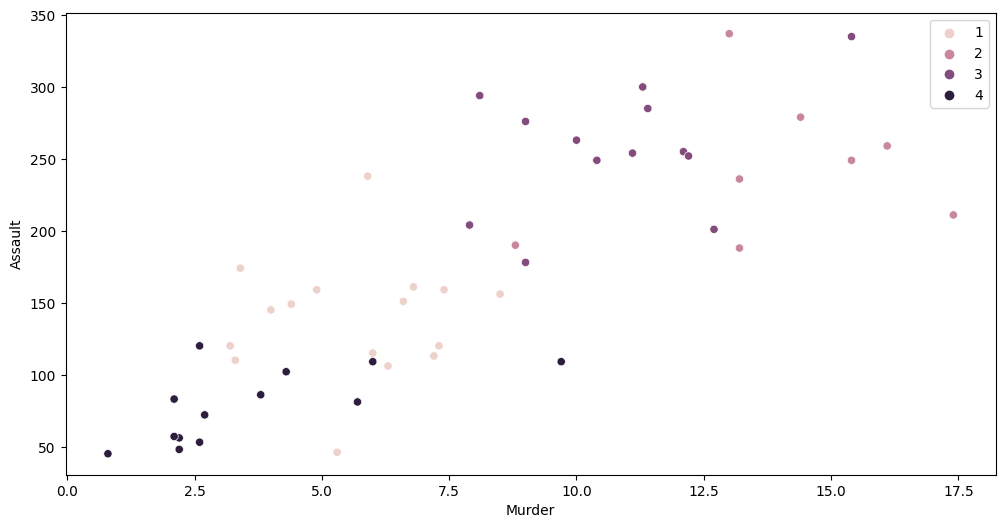

In [14]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmean1)

<Axes: xlabel='UrbanPop', ylabel='Rape'>

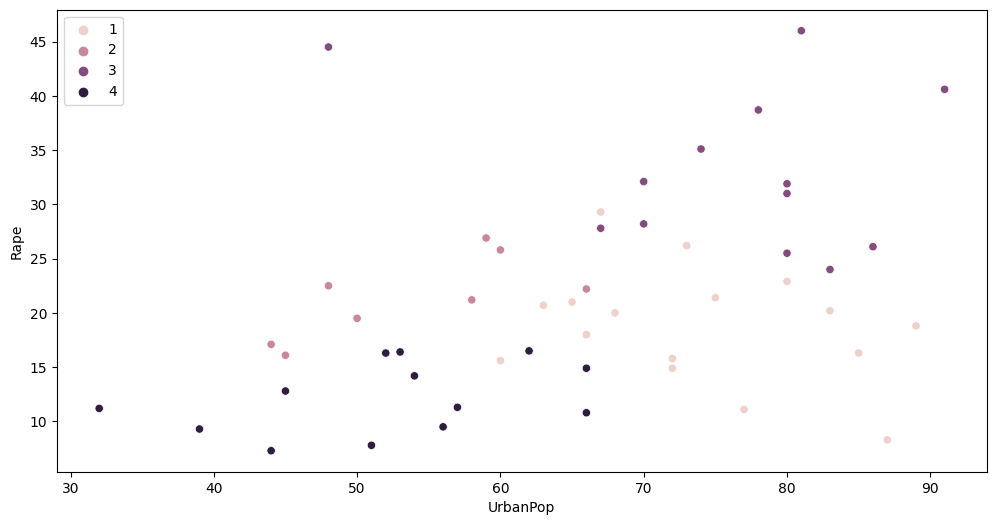

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['UrbanPop'], y = df['Rape'],hue=y_kmean1)

<Axes: xlabel='Murder', ylabel='UrbanPop'>

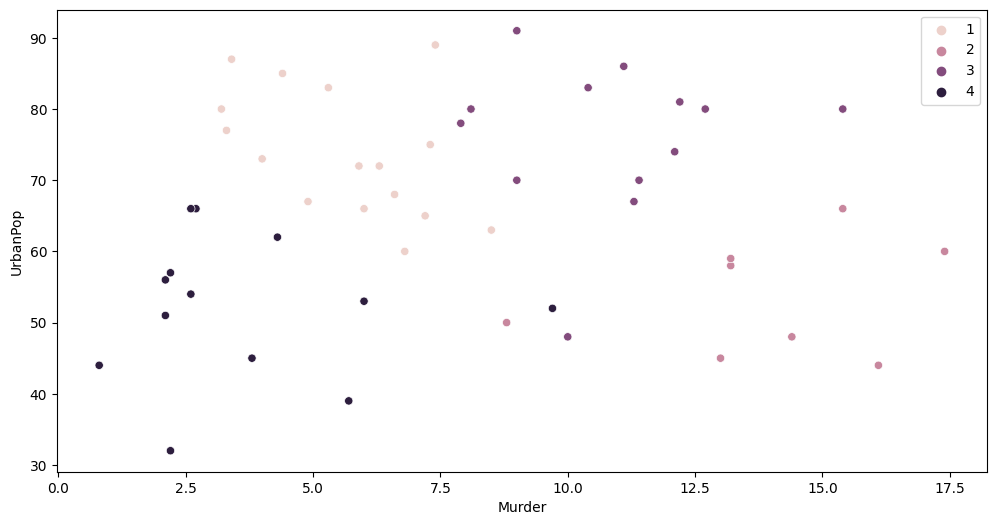

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['UrbanPop'],hue=y_kmean1)

<Axes: xlabel='Assault', ylabel='Rape'>

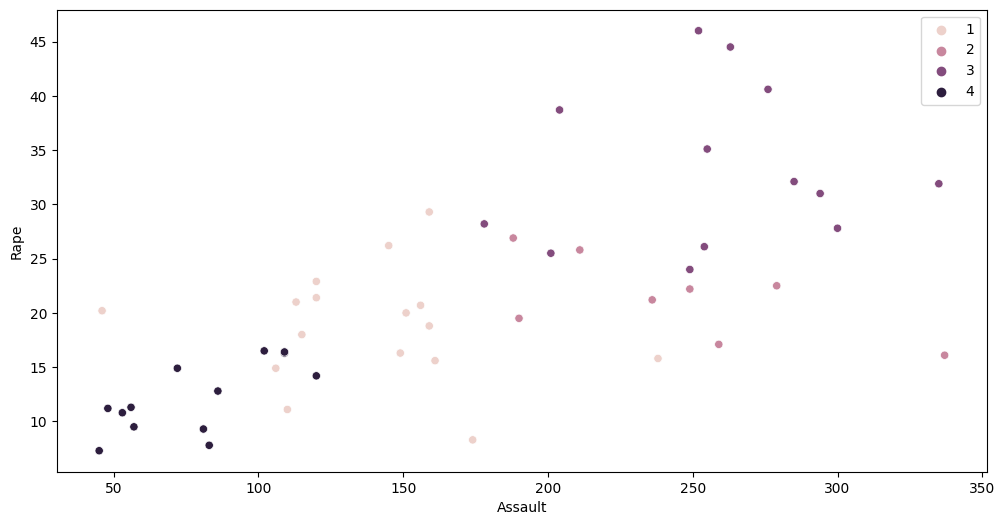

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Assault'], y = df['Rape'],hue=y_kmean1)

## Hierarchical

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [19]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
df1 = df.rename(columns={'Unnamed: 0':'State'})
df1.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<Axes: xlabel='State'>

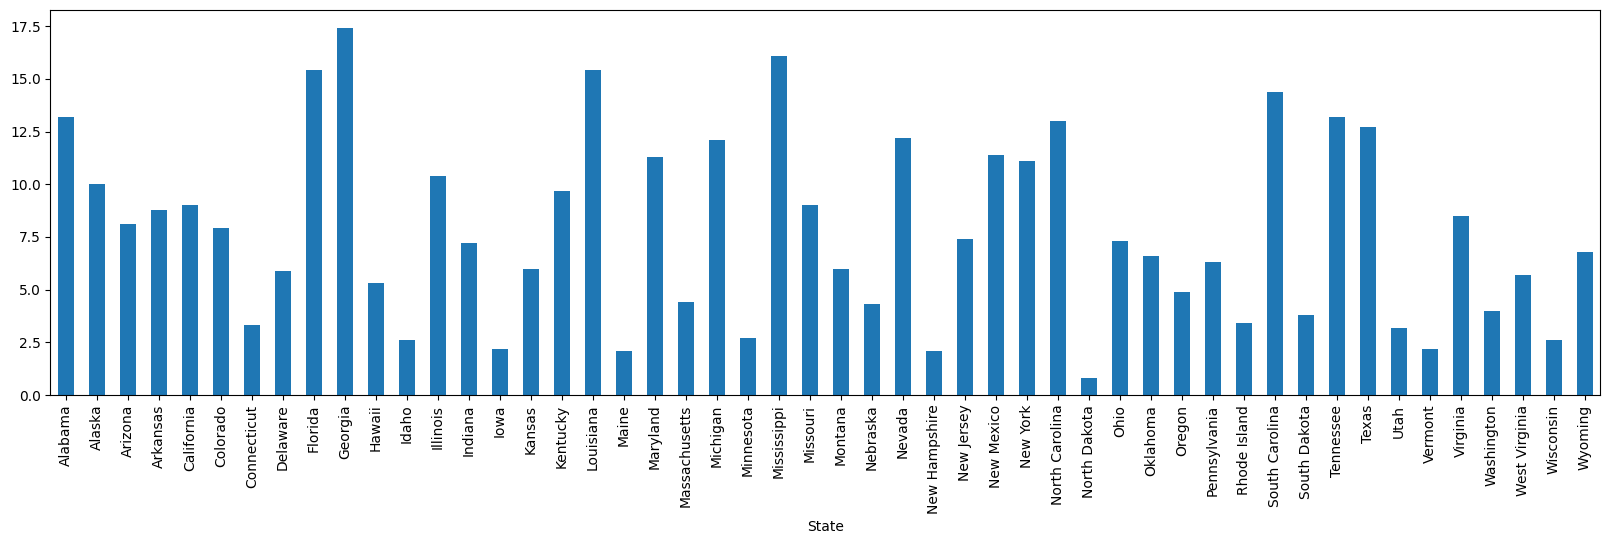

In [21]:
plt.figure(figsize=(20,5))
df1.groupby('State')['Murder'].max().plot(kind='bar')

<Axes: xlabel='State'>

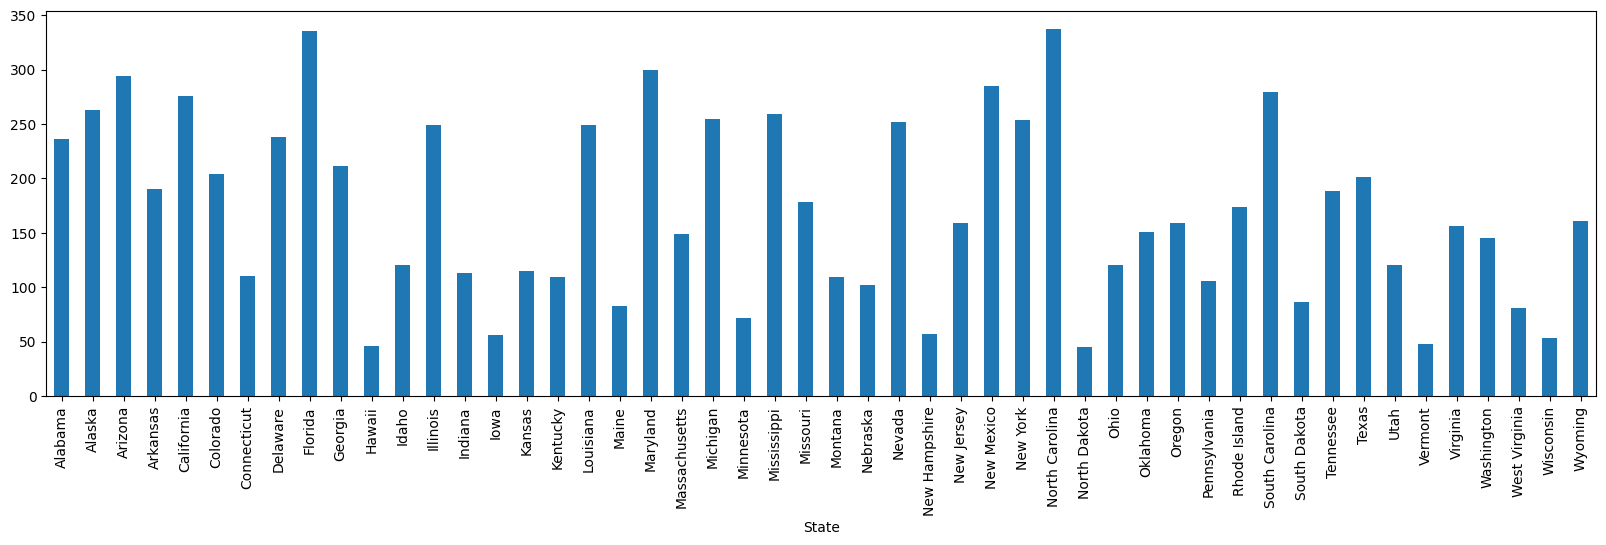

In [22]:
plt.figure(figsize=(20,5))
df1.groupby('State')['Assault'].max().plot(kind='bar')

<Axes: xlabel='State'>

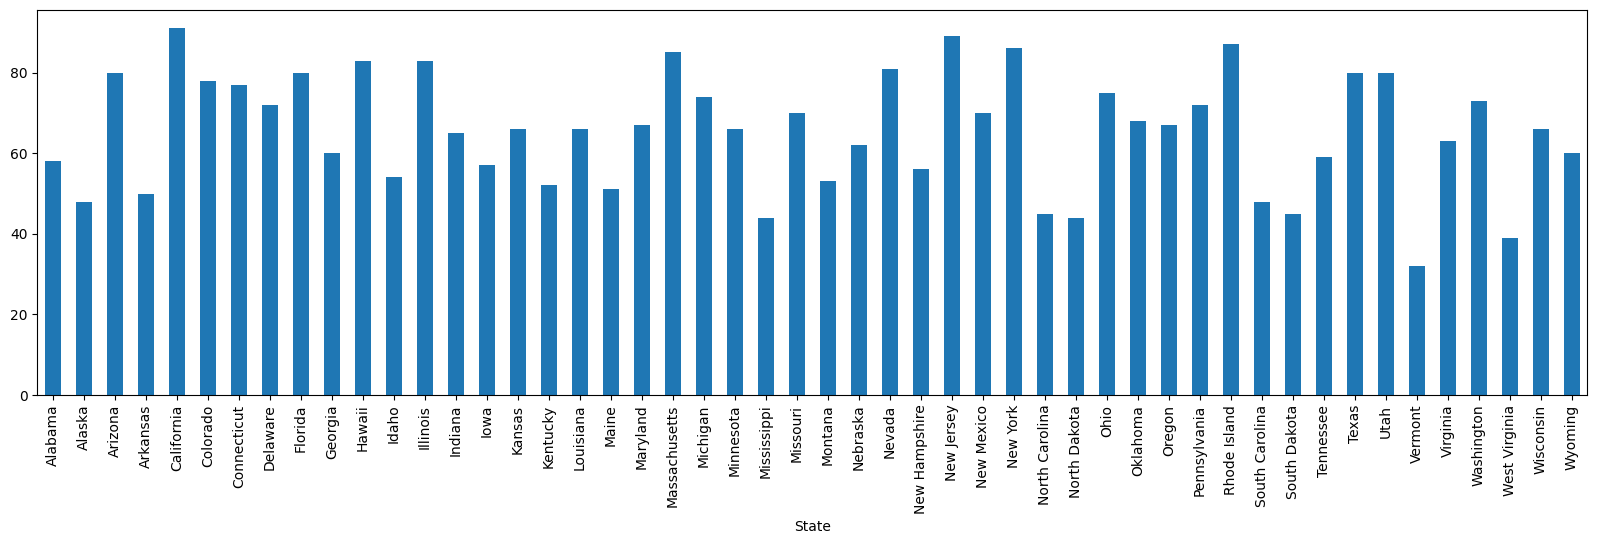

In [23]:
plt.figure(figsize=(20,5))
df1.groupby('State')['UrbanPop'].max().plot(kind='bar')

<Axes: xlabel='State'>

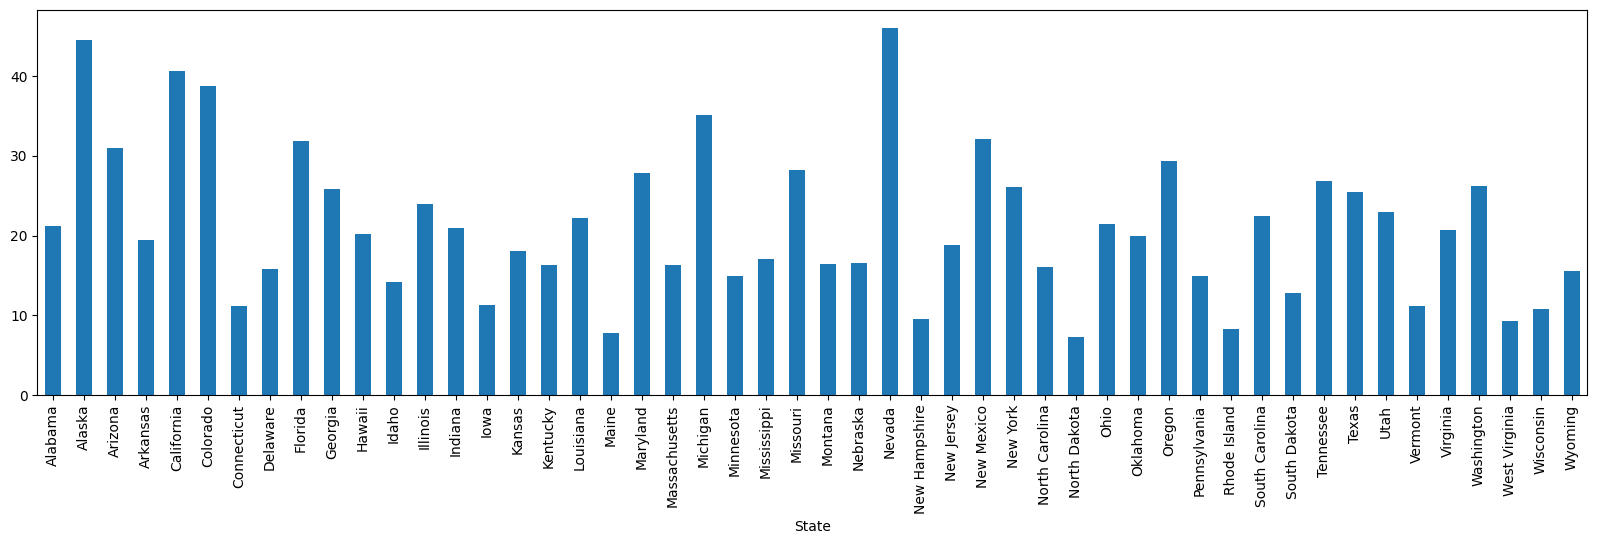

In [24]:
plt.figure(figsize=(20,5))
df1.groupby('State')['Rape'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

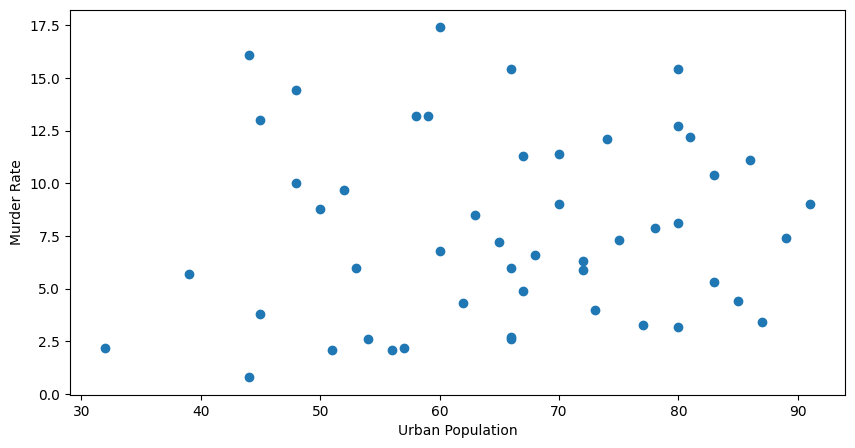

In [25]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=df1)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

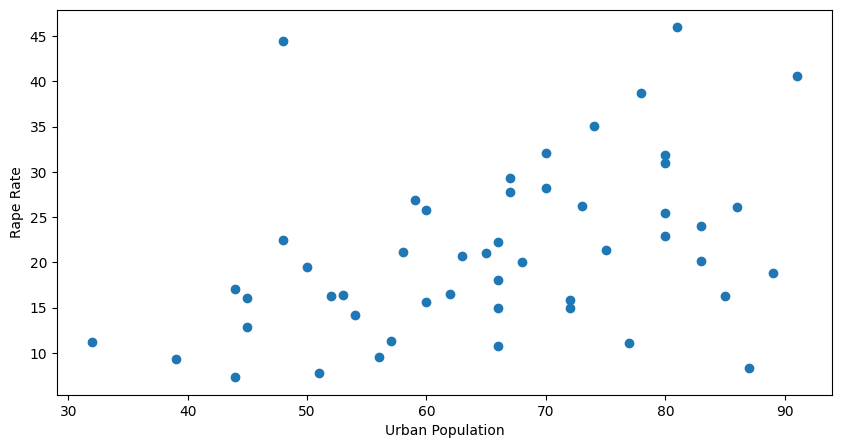

In [26]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=df1)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

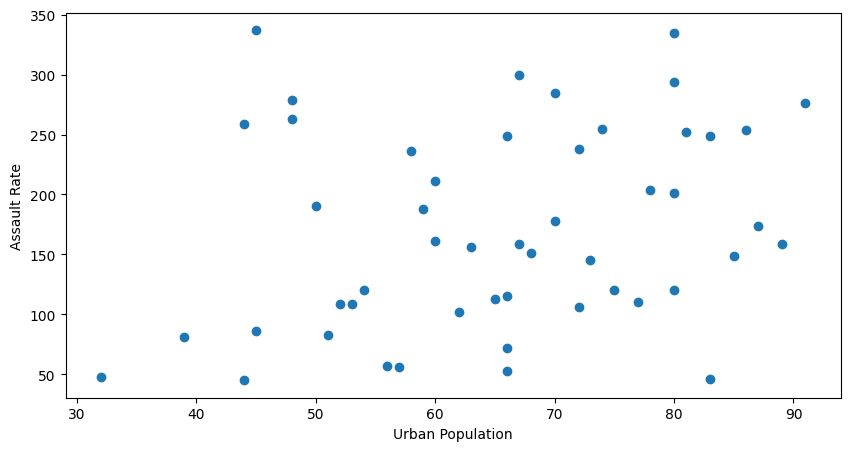

In [27]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=df1)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

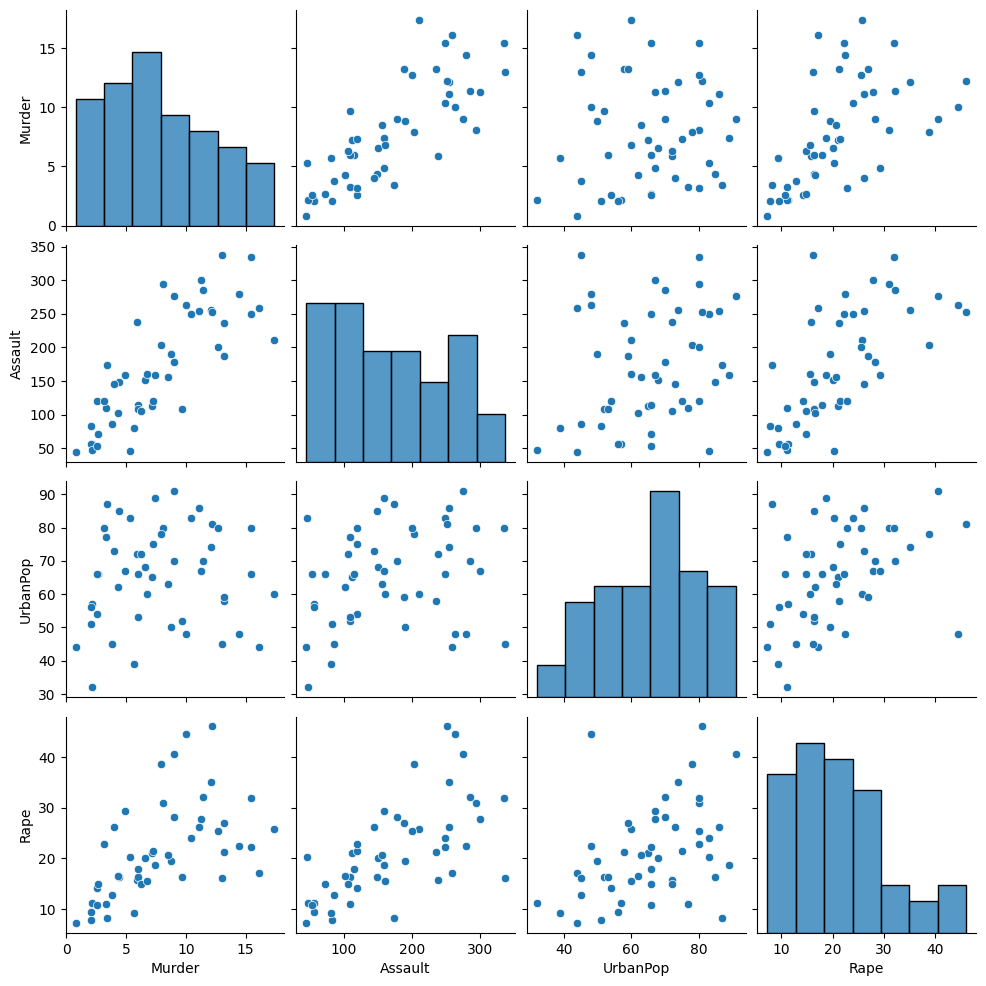

In [28]:
sns.pairplot(df1)

In [29]:
data = df1.iloc[:,1:].values

In [30]:
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

Text(0, 0.5, 'Euclidean distances')

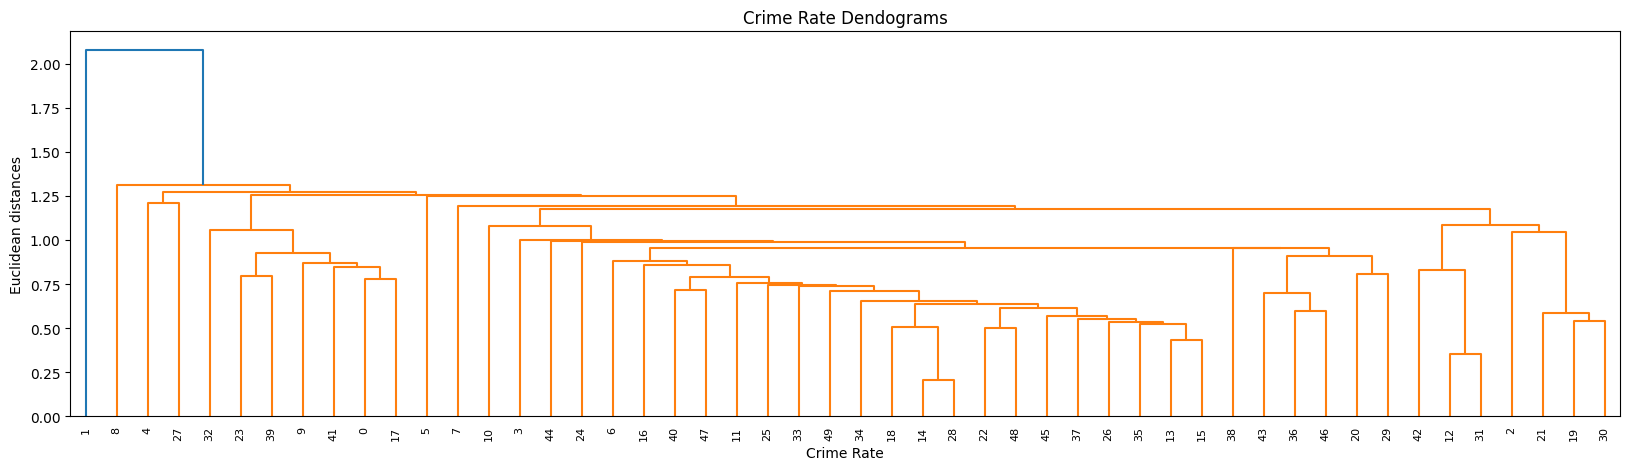

In [31]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

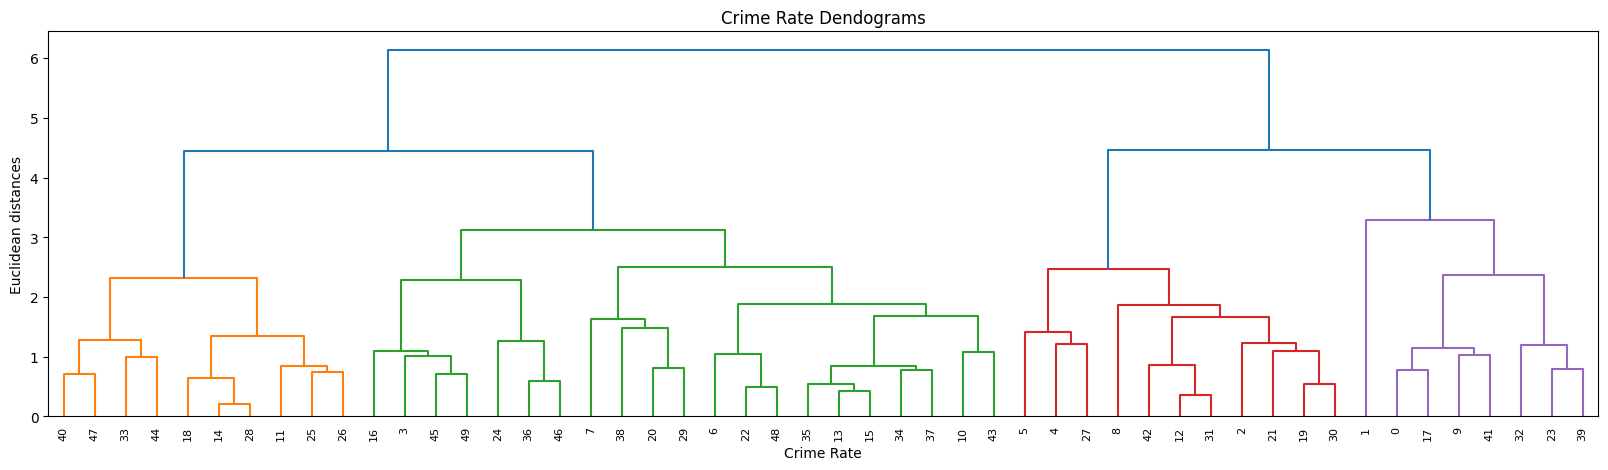

In [32]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

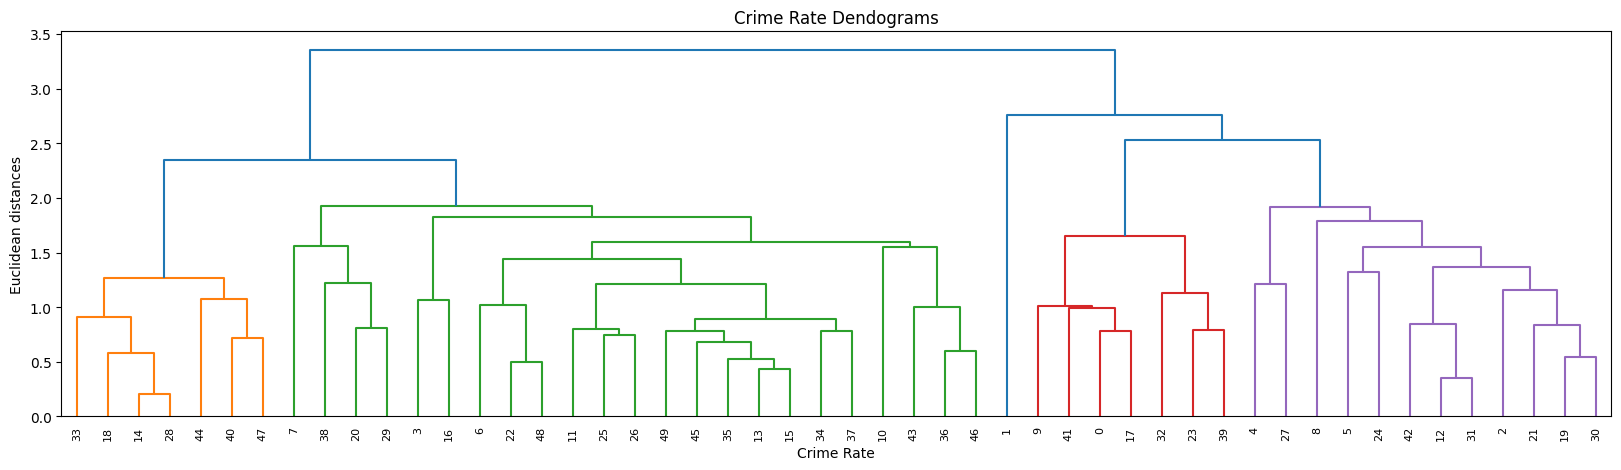

In [33]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

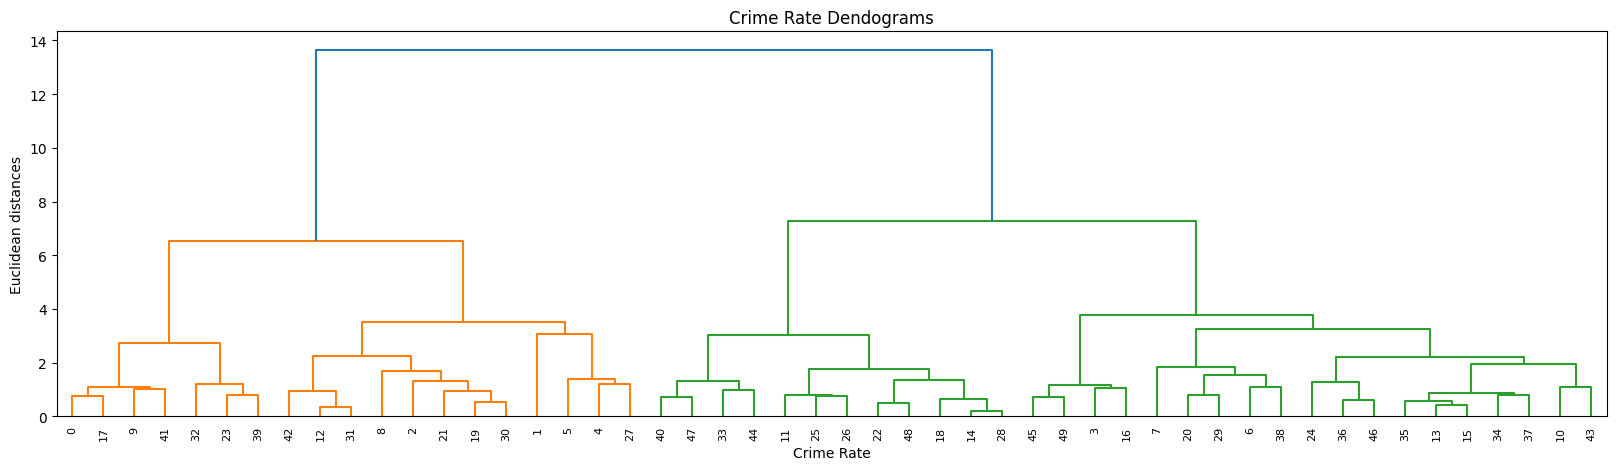

In [34]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [35]:
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [36]:
y_pred = ac.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [37]:
df1['cluster labels']= y_pred

In [38]:
df1[['State','cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


<Axes: xlabel='cluster labels', ylabel='Murder'>

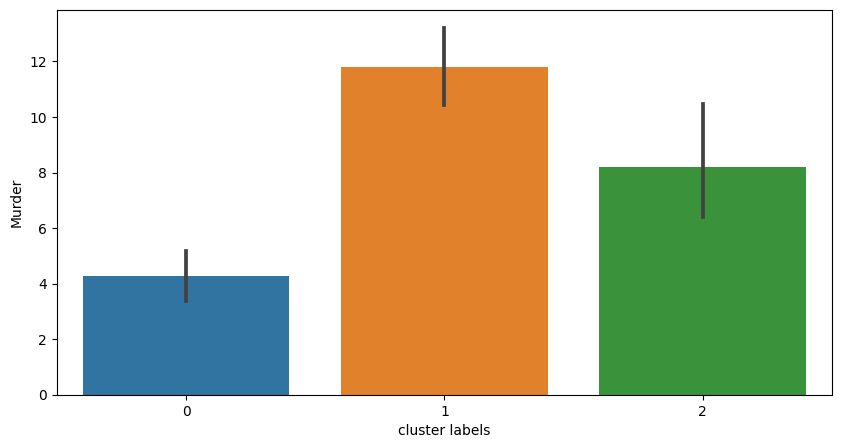

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='cluster labels', y='Murder', data=df1)

<Axes: xlabel='cluster labels', ylabel='Assault'>

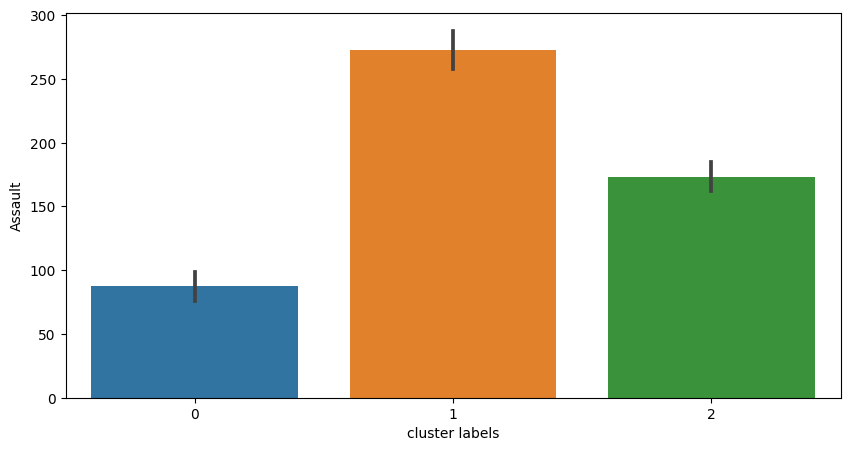

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='cluster labels', y='Assault', data=df1)

<Axes: xlabel='cluster labels', ylabel='UrbanPop'>

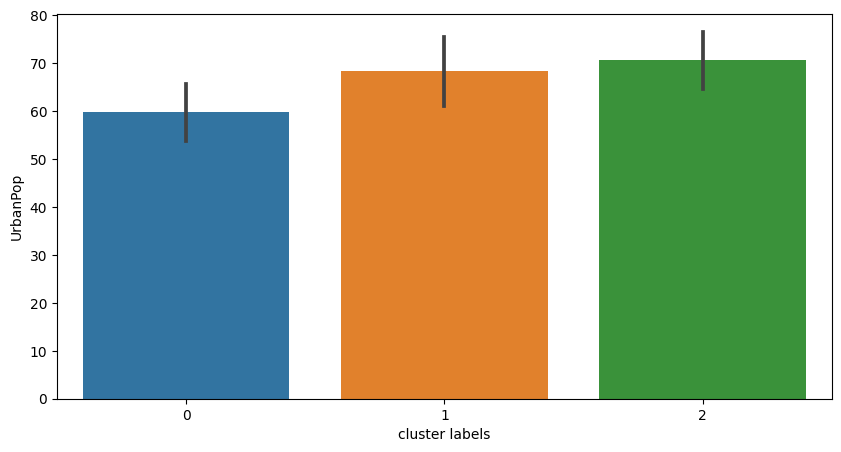

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='cluster labels', y='UrbanPop', data=df1)

<Axes: xlabel='cluster labels', ylabel='Rape'>

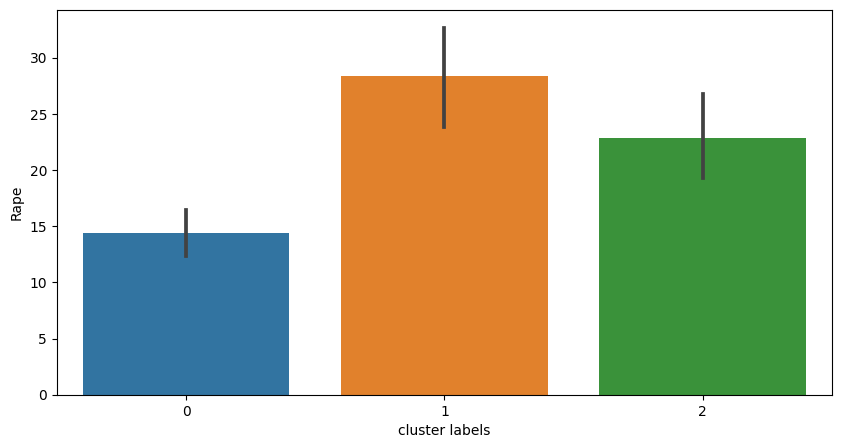

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='cluster labels', y='Rape', data=df1)

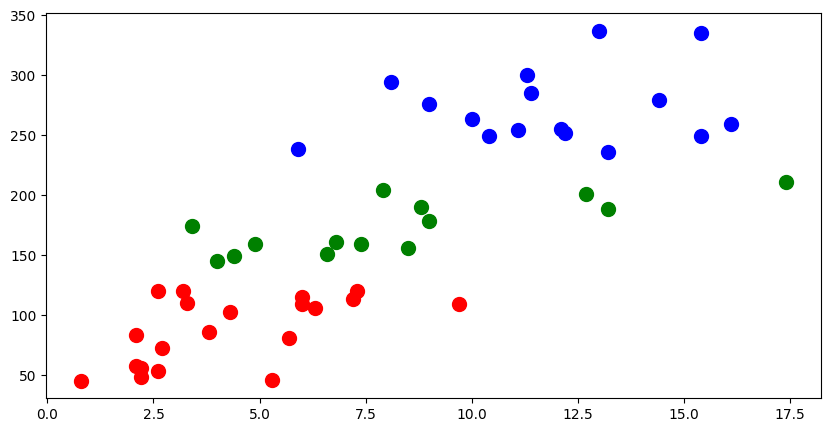

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green')
plt.show()

# DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(scaled_data)

DBSCAN(eps=1, min_samples=4)

In [46]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [47]:
df['clusters']=dbscan.labels_
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [48]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


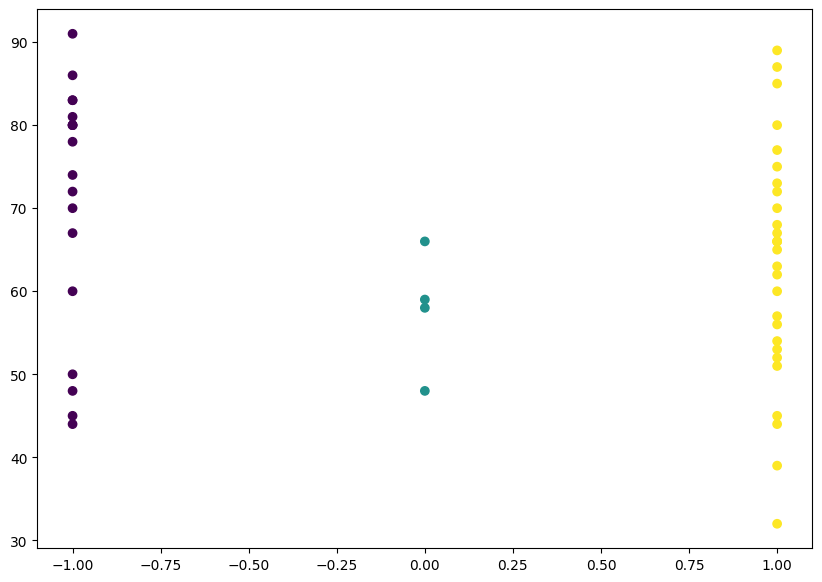

In [49]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_) 